## `用直觉找出基线`

这是今天的任务，后面会对基线这个词有所解释。 
现在任务目标明确了，就是要将有32 万笔数据的训练数据集（Training Set）交给NLP 模型，让它「阅读」每一列里头的假新闻A 与新闻B 的标题并了解它们之间的关系（不相关、B 同意A、B 不同意A）。 
理想上，在看过一大堆案例以后，我们的模型就能够「学会」一些法则，让它在被给定一组从来没看过的假新闻标题A 以及新闻标题B 的情况下，也能正确判断新闻A 与新闻B 的关系。 
而所谓的「模型从来没看过的数据」，这里指的就是8 万笔的测试数据集（Test Set）了。 

### 基线模型 

我们当然希望不管使用什么样的模型，它都能够帮我们减少人工检查的成本，并同时最大化分类的准确度。要知道它是不是有效怎么办？没有比较就没有伤害，究竟要跟哪个模型比较呢？要建立一个比较的基准，这就是基线模型（Baseline Model）的由来。 
建立基线模型可以有一系列的方法，在这个案例里，将给出一个最容易理解和信任的简单方法。 

In [1]:
TRAIN_CSV_PATH = "./train.csv" 
import pandas as pd 
train = pd . read_csv ( TRAIN_CSV_PATH , index_col = 0 ) 
cols = [ 'title1_zh' , 'title2_zh' , 'label' ] 
train = train . loc [:, cols ] 
cnt = train . iloc [:,-1:] .value_counts()

In [2]:
train.head()

,title1_zh,title2_zh,label
id,,,
0,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,unrelated
3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,unrelated
1,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,unrelated
2,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",去年深圳GDP首超香港？深圳统计局辟谣：还差611亿,unrelated
9,"""用大蒜鉴别地沟油的方法,怎么鉴别地沟油",吃了30年食用油才知道，一片大蒜轻松鉴别地沟油,agreed


首先，我们来看一下，在训练集中各种不同label（即新闻pairs的关系类别）的分布比例。 

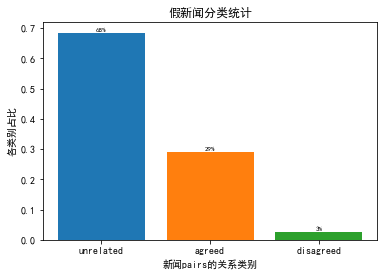

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
# 准备数据 
x_data = cnt.index.values 
y_data = np.asarray(cnt) / np.sum(np.asarray(cnt), axis=0) 
# 正确显示中文和负号 
plt.rcParams["font.sans-serif"] = ["SimHei"] 
plt.rcParams["axes.unicode_minus"] = False 
# 画图，plt.bar()可以画柱状图 
for i in range(len(x_data)): 
    plt.bar(x_data[i], y_data[i]) 
for i, j in zip(x_data, y_data): 
    plt.text(i, j , "%1.0f" % (100*j) + "%", ha="center", va="bottom", fontsize=7) 
# 设置图片名称 
plt.title("假新闻分类统计") 
# 设置x轴标签名 
plt.xlabel("新闻pairs的关系类别") 
# 设置y轴标签名 
plt.ylabel("各类别占比") 
# 显示 
plt.savefig(fname="imgs/3-out.png", dpi=300) 
plt.show() 

从上图中可以看出，这是一个常见的Unbalanced Dataset：特定的分类占了数据的大半比例。 
有接近70 % 的「成对新闻」都是不相关的。此处的「成对新闻」指的是数据集里，每一行的假新闻标题A 以及对应的标题B 所组成的pairs。 
现在假设测试数据集（Test Set）的数据分布跟训练数据集相差不远，且衡量一个分类模型的指标是准确度（Accuracy）：100 组成对新闻中，模型猜对几组。 
这时候如果要你用一个简单法则来分类所有成对新闻，并同时最大化准确度，你会怎么做？ 

---

没错，就是全部猜 unrelated 就完了！ 

这样，我们就构造出一个简单的基线模型，它在训练集上的准确率是<font color="#dd0000">**68%**</font>，记住这个数字。 